In [46]:
import networkx as nx
import numpy as np

In [47]:
def error(a,b):
    e=0
    for i in range(a.shape[1]):
        e+=abs(a.item(i)-b.item(i))
    return(e)

In [48]:
def pagerank_simple(p_mat,t_mat):
    while(True):
        demo=p_mat.dot(t_mat)
        if(error(demo,p_mat)<0.01):
            break
        else:
            p_mat=demo
    return(p_mat)

In [49]:
def transition_mat(graph):
    adj=nx.adjacency_matrix(graph).todense().astype(float)
    for i in range(len(graph.nodes)):
        if(adj[i].sum()!=0):
            adj[i]=adj[i]/adj[i].sum()
    return(adj)

In [50]:
def graph(n,p):
    g=nx.gnp_random_graph(n,p)
    nx.draw(g)
    adj=transition_mat(g)
    p_mat=np.matrix([1/n]*n)
    print("1.Simple\n2.Modified")
    q=int(input(prompt="Enter your choice :"))
    if (q==1):
        return(pagerank_simple(p_mat,adj))
    else:
        rand=np.random.randint(1,100,n)
        rand=list(map(lambda x:x/sum(rand),rand))
        j_mat=np.matrix(rand)
        return(pagerank_modified(p_mat,adj,j_mat))

In [51]:
def pagerank_modified(p_mat,t_mat,j_mat):
    c=0.8
    while(True):
        demo=c*p_mat.dot(t_mat)+(1-c)*j_mat
        if(error(demo,p_mat)<0.01):
            break
        else:
            p_mat=demo
    return(p_mat)

1.Simple
2.Modified
Enter your choice :1


matrix([[0.04915202, 0.02827928, 0.0488476 , 0.06345968, 0.04924156,
         0.07053234, 0.0354704 , 0.06315813, 0.05606007, 0.06313204,
         0.04906745, 0.04265372, 0.04951531, 0.04221291, 0.05646051,
         0.05635171, 0.02858547, 0.0283592 , 0.06295847, 0.05650213]])

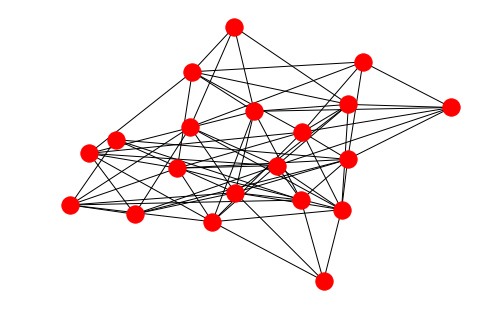

In [52]:
graph(20,0.4)

1.Simple
2.Modified
Enter your choice :2


matrix([[0.03556776, 0.0326874 , 0.03504149, 0.04481029, 0.03194456,
         0.03751212, 0.03591992, 0.02954091, 0.03149969, 0.03163568,
         0.03644248, 0.03330384, 0.03448537, 0.04038408, 0.03633102,
         0.02216345, 0.03244425, 0.03125667, 0.02510626, 0.03116236,
         0.02783003, 0.03363608, 0.03058872, 0.03421635, 0.03193051,
         0.03445582, 0.03225195, 0.03084358, 0.03668724, 0.03832011]])

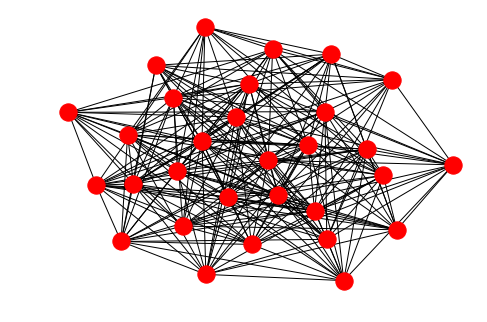

In [53]:
graph(30,0.6)